# Pandas
Panel Data Analysis

In [1]:
import pandas as pd
import numpy as np

## Объект Series

In [2]:
series = pd.Series([2, 5, 85, 0, 6])
series

0     2
1     5
2    85
3     0
4     6
dtype: int64

In [3]:
series.values

array([ 2,  5, 85,  0,  6])

In [ ]:
type(series.values)

numpy.ndarray

In [5]:
series.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
series2 = pd.Series([4, 7, -5, 3], index=['d', 'c', 'a', 'b'])
series2

d    4
c    7
a   -5
b    3
dtype: int64

In [8]:
series2.index

Index(['d', 'c', 'a', 'b'], dtype='object')

In [10]:
series2[2], series2['a']

C:\Users\BigBoss\AppData\Local\Temp\ipykernel_23736\3099624018.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series2[2], series2['a']


(np.int64(-5), np.int64(-5))

In [11]:
series2[1:-1]

c    7
a   -5
dtype: int64

In [13]:
series2[['a', 'd']]

a   -5
d    4
dtype: int64

In [14]:
series2[series2 > 0]

d    4
c    7
b    3
dtype: int64

In [15]:
series2[series2 >= 7] = 22
series2

d     4
c    22
a    -5
b     3
dtype: int64

In [16]:
arr = np.array([10, 20, 30, 40])
series3 = series2 + arr
series3

d    14
c    42
a    25
b    43
dtype: int64

In [17]:
series2 * 2

d     8
c    44
a   -10
b     6
dtype: int64

In [18]:
np.sqrt(series2)

e:\Препод\git\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


d    2.000000
c    4.690416
a         NaN
b    1.732051
dtype: float64

In [21]:
series2.mean(), np.mean(series2)

(np.float64(6.0), np.float64(6.0))

In [22]:
dict_data = {
    'Au': 565,
    'Ag': 789,
    'Pb': 224,
    'He': 123, 
}
series_dict = pd.Series(dict_data)
series_dict

Au    565
Ag    789
Pb    224
He    123
dtype: int64

In [23]:
'Au' in series_dict

True

In [24]:
'Zn' in series_dict

False

In [25]:
bad_data = {'a': 1, 'b': 2.0, 'c': 'Hello World'}
series_bad_dict = pd.Series(bad_data)
series_bad_dict

a              1
b            2.0
c    Hello World
dtype: object

In [26]:
series_bad_dict[series_bad_dict > 1]

TypeError: '>' not supported between instances of 'str' and 'int'

In [27]:
dict_data = {
    'Au': 565,
    'Ag': 789,
    'Pb': 224,
    'He': 123, 
}
series_4 = pd.Series(dict_data, index=['Ti', 'Au', 'Pb', 'Pl'])
series_4

Ti      NaN
Au    565.0
Pb    224.0
Pl      NaN
dtype: float64

In [28]:
pd.notnull(series_4)

Ti    False
Au     True
Pb     True
Pl    False
dtype: bool

In [29]:
pd.isnull(series_4)

Ti     True
Au    False
Pb    False
Pl     True
dtype: bool

In [30]:
series_4[series_4.notnull()]

Au    565.0
Pb    224.0
dtype: float64

In [31]:
series

0     2
1     5
2    85
3     0
4     6
dtype: int64

In [32]:
series.index = ['one', 'two', 'three', 'four', 'five']
series

one       2
two       5
three    85
four      0
five      6
dtype: int64

In [33]:
series[2] = 100
series

C:\Users\BigBoss\AppData\Local\Temp\ipykernel_23736\2546675218.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  series[2] = 100


one        2
two        5
three    100
four       0
five       6
dtype: int64

## DataFrame

#### CRUD (CRUD-операции)
- C - Create
- R - Read
- U - Update
- D - Delete

In [35]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [37]:
purchases.index = ['Black', 'Green', 'Smith', 'White']
purchases

,apples,oranges
Black,3,0
Green,2,3
Smith,0,7
White,1,2


In [38]:
purchases.loc['Green']

apples     2
oranges    3
Name: Green, dtype: int64

In [39]:
type(purchases.loc['Green'])

pandas.core.series.Series

In [40]:
purchases[0:-1]

,apples,oranges
Black,3,0
Green,2,3
Smith,0,7


In [42]:
purchases.loc['Green', ['oranges']]

oranges    3
Name: Green, dtype: int64

In [44]:
purchases.iloc[1, [1]]

oranges    3
Name: Green, dtype: int64

In [46]:
purchases.iloc[ [1, 2] ]

,apples,oranges
Green,2,3
Smith,0,7


In [ ]:
# Устаревшее (до 1.4.0): purchases.append({'apples': 10, 'oranges': 5})
purchases.loc['Watson'] = {'apples': 10, 'oranges': 5}
purchases

,apples,oranges
Black,3,0
Green,2,3
Smith,0,7
White,1,2
Watson,10,5


In [51]:
purchases.drop(['Smith'])
purchases

,apples,oranges
Black,3,0
Green,2,3
Smith,0,7
White,1,2
Watson,10,5


In [52]:
# Способ №1
# purchases = purchases.drop(['Smith'])

# Способ №2
purchases.drop(['Smith'], inplace=True)
purchases

,apples,oranges
Black,3,0
Green,2,3
White,1,2
Watson,10,5


In [53]:
purchases.T

,Black,Green,White,Watson
apples,3,2,1,10
oranges,0,3,2,5


In [56]:
purchases['oranges']['Black'] = 7
purchases

,apples,oranges
Black,3,7
Green,2,3
White,1,2
Watson,10,5


In [57]:
purchases.at['Black', 'apples'] = 1
purchases

,apples,oranges
Black,1,7
Green,2,3
White,1,2
Watson,10,5


In [58]:
purchases['White']['oranges'] = 0
purchases

KeyError: 'White'

In [59]:
purchases.T['White']['oranges'] = 0
purchases

,apples,oranges
Black,1,7
Green,2,3
White,1,2
Watson,10,5


In [60]:
purchases['oranges'] >= 5

Black      True
Green     False
White     False
Watson     True
Name: oranges, dtype: bool

In [61]:
purchases[purchases['oranges'] >= 5]

,apples,oranges
Black,1,7
Watson,10,5


In [62]:
purchases[purchases['oranges'] >= 5] = 0
purchases

,apples,oranges
Black,0,0
Green,2,3
White,1,2
Watson,0,0


In [63]:
'oranges' in purchases, 'lemons' in purchases

(True, False)

In [64]:
purchases

,apples,oranges
Black,0,0
Green,2,3
White,1,2
Watson,0,0


In [71]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data, index=['Black', 'Green', 'White', 'Watson'])
purchases

,apples,oranges
Black,3,0
Green,2,3
White,0,7
Watson,1,2


In [66]:
purchases['apples'].sum()

np.int64(6)

In [68]:
purchases.sum(axis=1)

Black     3
Green     5
White     7
Watson    3
dtype: int64

In [72]:
purchases['items'] = purchases.sum(axis=1)
purchases

,apples,oranges,items
Black,3,0,3
Green,2,3,5
White,0,7,7
Watson,1,2,3


In [73]:
purchases.mean()

apples     1.5
oranges    3.0
items      4.5
dtype: float64

# Титаник

In [8]:
import re

In [46]:
with open('data/titanic.csv', 'r') as f:
    data = f.readlines()

In [41]:
len(data)

892

In [50]:
data[1]

'1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'

In [49]:
data[1].strip().split(',')

['1',
 '0',
 '3',
 '"Braund',
 ' Mr. Owen Harris"',
 'male',
 '22',
 '1',
 '0',
 'A/5 21171',
 '7.25',
 '',
 'S']

In [51]:
re.split(r',(?=(?:[^"]*"[^"]*")*[^"]*$)', data[1])

['1',
 '0',
 '3',
 '"Braund, Mr. Owen Harris"',
 'male',
 '22',
 '1',
 '0',
 'A/5 21171',
 '7.25',
 '',
 'S\n']

# Как работает это выражение
,               - ищем запятую  
(?=             - позитивный просмотр вперед (lookahead)  
  - (?:           - не захватывающая группа  
    - [^"]*       - любые символы, кроме кавычки, 0 или более раз  
    - "           - кавычка  
    - [^"]*       - любые символы, кроме кавычки, 0 или более раз  
    - "           - закрывающая кавычка  
  - )*            - повторяем эту группу 0 или более раз  
  - [^"]*         - любые символы, кроме кавычки, 0 или более раз  
  - $             - конец   
)

In [52]:
data = [re.split(r',(?=(?:[^"]*"[^"]*")*[^"]*$)', line.strip()) for line in data]

In [43]:
data = [line.strip().split(',') for line in data]

In [53]:
data_titanic = pd.DataFrame(data[1:], columns=data[0])
data_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"""Braund, Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings, Mrs. John Bradley (Florence Briggs T...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen, Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle, Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen, Mr. William Henry""",male,35,0,0,373450,8.05,,S


In [54]:
data_titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
data_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
data_titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [95]:
data_titanic.shape

(891, 11)

In [96]:
data_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
data_titanic['Sex']

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

In [105]:
# Сколько на борту мужчин и женщин?
data_titanic[data_titanic['Sex'] == 'male'].shape[0], data_titanic[data_titanic['Sex'] != 'male'].shape[0]

(577, 314)

In [106]:
data_titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [107]:
data_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Количество несовершеннолетних детей
data_titanic[data_titanic['Age'] < 18].shape[0], data_titanic[data_titanic['Age'] < 18].value_counts()

113

In [112]:
data_titanic[data_titanic['Age'] < 18]['Sex'].value_counts()

Sex
male      58
female    55
Name: count, dtype: int64

In [130]:
# Каков процент выживших среди пассажиров кают всех классов?
# data_titanic[(data_titanic['Pclass'] == 1)]
for i in [1, 2, 3]:
    # temp = data_titanic[(data_titanic['Pclass'] == i) & (data_titanic['Survived'])].shape[0] / data_titanic[(data_titanic['Pclass'] == i)].shape[0]
    temp = data_titanic[data_titanic['Pclass'] == i]['Survived'].mean()
    print(f'Class #{i}: {temp:.02%}')

Class #1: 62.96%
Class #2: 47.28%
Class #3: 24.24%


In [128]:
(data_titanic.groupby('Pclass')['Survived'].mean() * 100).round(2)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

In [38]:
data_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data_titanic[data_titanic['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [66]:
df = data_titanic['Age'].copy()
df.shape

(891,)

In [65]:
df = df.dropna()
df.shape

(714,)

In [68]:
df_zero = df.fillna(0)
df_zero.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      0.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [70]:
df_mean = df.fillna(df.mean().round(0))
df_mean.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     30.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [77]:
df = pd.DataFrame(np.random.randint(0, 10, size=(4, 3)), columns=list('abc'), index=['White', 'Black', 'Smith', 'Watson'])
df

,a,b,c
White,7,2,0
Black,4,0,6
Smith,5,9,9
Watson,0,3,3


In [75]:
def apply_func(ser):
    return ser.max() - ser.min()

df.apply(apply_func, axis=1)

White     9
Black     6
Smith     1
Watson    6
dtype: int32

In [81]:
df['width'] = df.apply(apply_func, axis=1)
df

,a,b,c,width
White,7,2,0,7
Black,4,0,6,6
Smith,5,9,9,4
Watson,0,3,3,3


In [82]:
data_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Поделить людей по категориям (по возрасту):  
    - < 30 -> 1  
    - >= 30 & < 55 -> 2  
    - >= 55 -> 3  

In [84]:
def age_category(age):
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

data_titanic['Age_category'] = data_titanic['Age'].apply(age_category)
data_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [85]:
bins = [0, 30, 55, 100]
age_category = pd.cut(data_titanic['Age'], bins, right=False)
age_category

PassengerId
1       [0.0, 30.0)
2      [30.0, 55.0)
3       [0.0, 30.0)
4      [30.0, 55.0)
5      [30.0, 55.0)
           ...     
887     [0.0, 30.0)
888     [0.0, 30.0)
889             NaN
890     [0.0, 30.0)
891    [30.0, 55.0)
Name: Age, Length: 891, dtype: category
Categories (3, interval[int64, left]): [[0, 30) < [30, 55) < [55, 100)]

In [86]:
labels = [1, 2, 3]
age_category = pd.cut(data_titanic['Age'], bins, right=False, labels=labels)
age_category

PassengerId
1        1
2        2
3        1
4        2
5        2
      ... 
887      1
888      1
889    NaN
890      1
891      2
Name: Age, Length: 891, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [ ]:
data_titanic['Age_category_1'] = pd.cut(data_titanic['Age'], bins, right=False, labels=labels)
data_titanic

In [88]:
data_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Age_category_1
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN


In [89]:
data_titanic.T.duplicated()

Survived          False
Pclass            False
Name              False
Sex               False
Age               False
SibSp             False
Parch             False
Ticket            False
Fare              False
Cabin             False
Embarked          False
Age_category      False
Age_category_1    False
dtype: bool

In [90]:
df_meteo = pd.read_csv('data/df_meteo.csv', sep=';')
df_meteo

,Date,OutTemperature,Humidity,Bar
0,2025-10-01 00:05:00,0.5,93,763.9
1,2025-10-01 00:10:00,0.5,93,763.9
2,2025-10-01 00:15:00,0.4,93,763.9
3,2025-10-01 00:20:00,0.4,93,764.0
4,2025-10-01 00:25:00,0.4,93,764.0
...,...,...,...,...
6213,2025-11-24 10:20:00,2.3,97,739.9
6214,2025-11-24 10:25:00,2.4,98,739.8
6215,2025-11-24 10:30:00,2.5,98,739.9
6216,2025-11-24 10:35:00,2.5,98,739.7


In [92]:
df_meteo['Date']

0       2025-10-01 00:05:00
1       2025-10-01 00:10:00
2       2025-10-01 00:15:00
3       2025-10-01 00:20:00
4       2025-10-01 00:25:00
               ...         
6213    2025-11-24 10:20:00
6214    2025-11-24 10:25:00
6215    2025-11-24 10:30:00
6216    2025-11-24 10:35:00
6217    2025-11-24 10:40:00
Name: Date, Length: 6218, dtype: object

In [93]:
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'])

In [94]:
df_meteo['Date']

0      2025-10-01 00:05:00
1      2025-10-01 00:10:00
2      2025-10-01 00:15:00
3      2025-10-01 00:20:00
4      2025-10-01 00:25:00
               ...        
6213   2025-11-24 10:20:00
6214   2025-11-24 10:25:00
6215   2025-11-24 10:30:00
6216   2025-11-24 10:35:00
6217   2025-11-24 10:40:00
Name: Date, Length: 6218, dtype: datetime64[ns]

<Axes: >

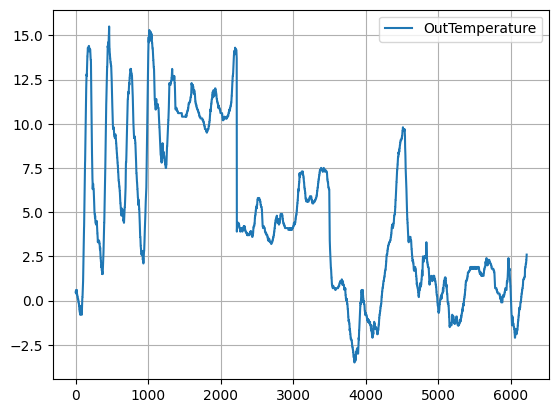

In [102]:
df_meteo['OutTemperature'].plot(grid=True, legend=True)

In [103]:
import matplotlib.pyplot as plt

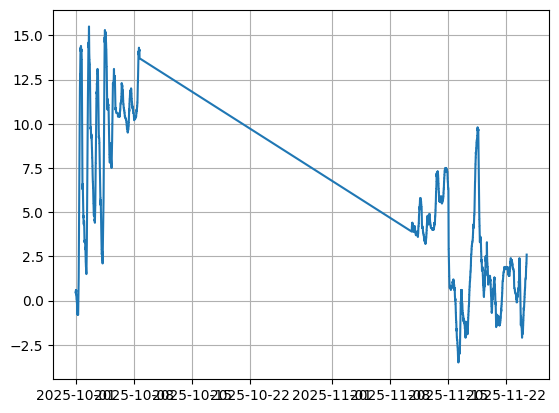

In [104]:
plt.plot(df_meteo['Date'], df_meteo['OutTemperature'])
plt.grid()
plt.show()

In [106]:
df = df_meteo[df_meteo['Date'] < pd.to_datetime('2025-10-02', format='%Y-%m-%d')]

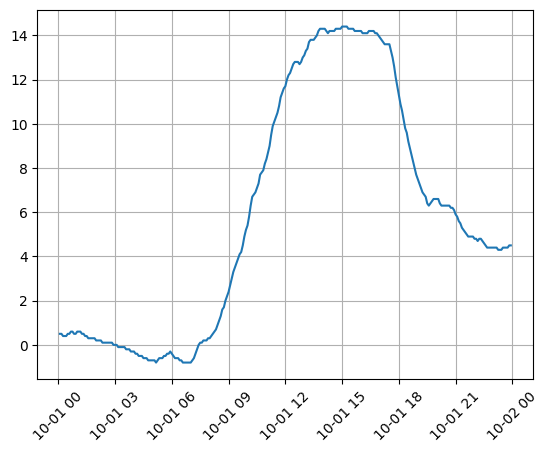

In [108]:
plt.plot(df['Date'], df['OutTemperature'])
plt.xticks(rotation=45)
plt.grid()
plt.show()